After I loaded in the data I only did some basic cleaning, enough to start processing the data. 

* Changed the column names to a consistent capitalization.
* Changed Creation Date and Completion Date to datetime fields
* Deleted the columns containing "Dup", so we would only have unique requests
* Got rid of Ward 0
* Reset the index


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://data.cityofchicago.org/api/views/7as2-ds3y/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')
df.columns = ['Creation Date', 'Status', 'Completion Date', 'Service Request Number', 'Type of Service Request', 'Current Activity', 'Most Recent Action', 'Number of Potholes Filled on Block', 'Street Address', 'Zip', 'X Coordinate', 'Y Coordinate', 'Ward', 'Police District', 'Community Area', 'SSA', 'Latitude', 'Longitude', 'Location']
df['Creation Date'] =  pd.to_datetime(df['Creation Date'])
df['Completion Date'] =  pd.to_datetime(df['Completion Date'])
df = df[~df['Status'].str.contains("Dup")]
df = df[df['Ward'] != 0]
df = df.reset_index(drop=True)
df.head()


/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Current Activity,Most Recent Action,Number of Potholes Filled on Block,Street Address,Zip,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,1.166945e+06,1.839061e+06,19.0,22.0,72.0,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)"
1,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,1.150258e+06,1.881340e+06,22.0,10.0,30.0,NaN,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)"
2,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,1.180265e+06,1.853038e+06,6.0,6.0,69.0,51.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)"
3,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,1.177809e+06,1.852641e+06,6.0,6.0,44.0,NaN,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)"
4,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,1.179971e+06,1.852707e+06,6.0,6.0,44.0,51.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394992 entries, 0 to 394991
Data columns (total 19 columns):
Creation Date                         394992 non-null datetime64[ns]
Status                                394992 non-null object
Completion Date                       391313 non-null datetime64[ns]
Service Request Number                394992 non-null object
Type of Service Request               394992 non-null object
Current Activity                      390841 non-null object
Most Recent Action                    390524 non-null object
Number of Potholes Filled on Block    388916 non-null float64
Street Address                        394990 non-null object
Zip                                   393699 non-null float64
X Coordinate                          394659 non-null float64
Y Coordinate                          394659 non-null float64
Ward                                  394767 non-null float64
Police District                       394766 non-null float64
Community Are

The obvious trend for pothole formation would be seasonality. More potholes will be formed at the end of winter and spring, due to weather and thawing. I would like to confirm this basic trend with the data, so I set a mask of exactly a year from December 2017 to December 2018, assign a month column and plot service request count based on month. 

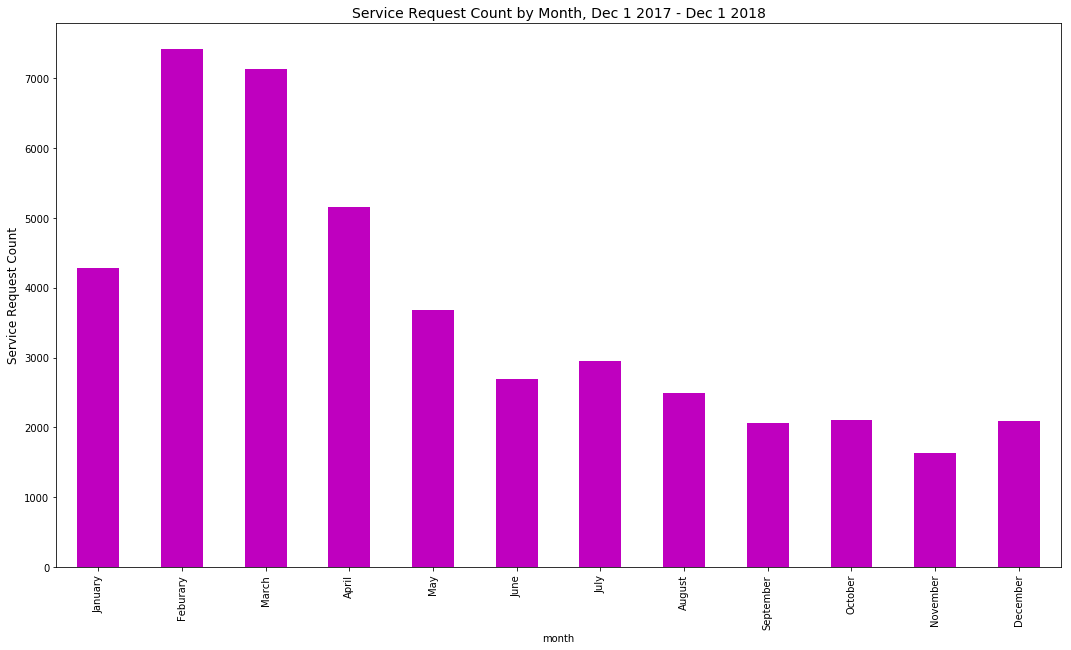

In [6]:
mask = (df['Creation Date'] > '2017-12-01') & (df['Creation Date'] < '2018-12-01')
df1 = df.loc[mask]

months_list = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months = []

for date in df1['Creation Date']:
    months.append(months_list[date.month-1])
df1 = df1.assign(month = months)

requests_by_month = df1.groupby('month')['Service Request Number'].count()

fig = plt.figure(figsize=(18, 10))
requests_by_month.loc[months_list].plot(kind='bar', color = 'm')
plt.ylabel('Service Request Count', fontsize = 12)
plt.title('Service Request Count by Month, Dec 1 2017 - Dec 1 2018', fontsize=14)
ax = plt.gca()

TBD: I would like to plot this against snowfall and snow depth but I'm still waiting for my data request to be processed. 

I'm now going to look at the counts for each ward and pick one with a lot of data. I picked ward 19, since ward 41 contains O'hare and I didn't know if that would make my results weird. 

In [10]:
df['Ward'].value_counts()

41.0    13967
19.0    12557
23.0    12095
42.0    12039
13.0    11638
45.0    10995
8.0     10898
32.0    10237
34.0    10097
18.0    10050
21.0     9978
2.0      9826
39.0     9369
10.0     9366
27.0     9262
38.0     9258
36.0     9097
14.0     8946
11.0     8522
6.0      8339
9.0      8163
50.0     8049
25.0     7829
29.0     7693
5.0      7682
12.0     7438
28.0     7305
40.0     7048
17.0     7047
1.0      6857
31.0     6651
3.0      6500
16.0     6484
24.0     6443
35.0     6272
47.0     6213
26.0     6206
7.0      6127
20.0     6083
37.0     6020
15.0     5984
43.0     5948
49.0     5604
30.0     5598
4.0      5461
33.0     5186
22.0     4715
44.0     4564
48.0     4051
46.0     3010
Name: Ward, dtype: int64

In [45]:
df2 = df.loc[df['Ward']==19.0]
df2.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Current Activity,Most Recent Action,Number of Potholes Filled on Block,Street Address,Zip,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,1.166945e+06,1.839061e+06,19.0,22.0,72.0,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)"
8,2011-01-01,Completed,2011-01-03,11-00003356,Pot Hole in Street,Dispatch Crew,Pothole Patched,32.0,9899 S VANDERPOEL AVE,60643.0,1.166627e+06,1.839052e+06,19.0,22.0,72.0,NaN,41.714022,-87.665222,"(41.71402220124287, -87.66522178348544)"
49,2012-01-01,Completed,2012-01-03,12-00001042,Pot Hole in Street,Dispatch Crew,Completed,0.0,9500 S VANDERPOEL AVE,60643.0,1.166280e+06,1.841687e+06,19.0,22.0,72.0,4.0,41.721103,-87.666688,"(41.72110267287218, -87.66668839327973)"
51,2012-01-01,Completed,2012-01-03,12-00002306,Pot Hole in Street,Dispatch Crew,Pothole Patched,9.0,2640 W 105TH ST,60655.0,1.160474e+06,1.834907e+06,19.0,22.0,72.0,NaN,41.702785,-87.688111,"(41.70278534051118, -87.68811088531193)"
52,2012-01-01,Completed,2012-01-03,12-00002308,Pot Hole in Street,Dispatch Crew,WM Water Management General Investigation Tran...,0.0,2500 W 105TH ST,60655.0,1.161567e+06,1.834932e+06,19.0,22.0,72.0,NaN,41.702831,-87.684061,"(41.70283144187432, -87.68406078546418)"


In [70]:
df2['Street Address'].value_counts()

10500 S LONGWOOD DR      26
9500 S CHARLES ST        25
9700 S LONGWOOD DR       24
9900 S LONGWOOD DR       23
10300 S WESTERN AVE      22
2300 W 99TH ST           19
11300 S WESTERN AVE      18
9800 S LONGWOOD DR       17
9100 S DAMEN AVE         17
9900 S WESTERN AVE       17
10400 S HALE AVE         17
9300 S DAMEN AVE         16
10600 S KEDZIE AVE       16
10700 S LONGWOOD DR      16
2200 W 99TH ST           16
1932 W 92ND ST           15
2000 W 96TH ST           15
9900 S PROSPECT AVE      15
10300 S KEDZIE AVE       15
9200 S BELL AVE          15
3200 W 108TH ST          15
11524 S OAKLEY AVE       14
1900 W 99TH ST           14
11100 S WESTERN AVE      14
2100 W 99TH ST           14
9100 S HAMILTON AVE      14
9000 S HAMILTON AVE      14
10300 S WALDEN PKWY      13
9900 S DAMEN AVE         13
10400 S WESTERN AVE      13
                         ..
3326 W 111TH ST           1
10421 S LONGWOOD DR       1
9234 S VANDERPOEL AVE     1
9304 S CLAREMONT AVE      1
10913 S MILLARD AVE 

I found a shapefile containing Chicago's ward boundaries. I want to try out geopandas to see if I can map the pothole requests.

In [48]:

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
df2['Coordinates'] = list(zip(df2.Longitude, df2.Latitude))
df2['Coordinates'] = df2['Coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df2, geometry='Coordinates')

In [53]:
g1 = gpd.read_file("Wards/chiwards.shp")
g1.head()


,shape_area,shape_leng,ward,geometry
0,1.160965e+08,93073.340838,12,POLYGON ((-87.69623470134458 41.85755495238389...
1,1.031436e+08,97901.323833,16,POLYGON ((-87.66288923669032 41.79883809868242...
2,6.558830e+07,82183.694820,15,POLYGON ((-87.69817510963803 41.81729440755995...
3,1.372904e+08,90105.195619,20,POLYGON ((-87.65524133440029 41.80883316182794...
4,4.973346e+07,38122.692826,49,POLYGON ((-87.66420403810295 42.02126158052747...


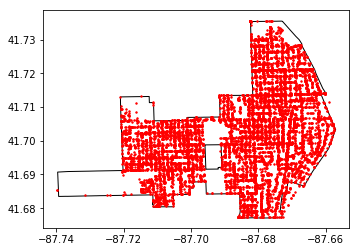

In [52]:
ax = g1[g1['ward'] == '19'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red', markersize=2)

plt.show()

Now I want to get the street network, but only within a certain ward boundary - so we use the ward boundary as a bounding box. 

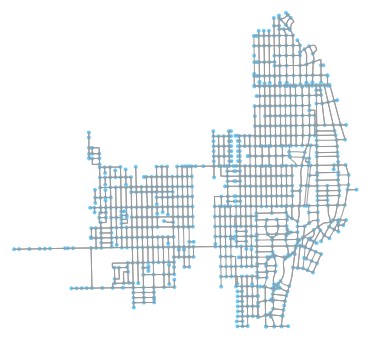

In [67]:
import osmnx as ox
cw = gpd.read_file('Wards/chiwards.shp')
ward_19 = cw[(cw['ward']=='19')]
polygon = ward_19['geometry'].iloc[0]
G6 = ox.graph_from_polygon(polygon, network_type='drive')
G6_projected = ox.project_graph(G6)
fig, ax = ox.plot_graph(G6_projected)